<a href="https://colab.research.google.com/github/abhinav-sharma-6167/Advanced-ML/blob/main/CreditDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('creditdata.csv')

In [ ]:
df.head()

df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])

df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])


df['PAY_1_new'] = df['PAY_1'].copy()
df['PAY_2_new'] = df['PAY_2'].copy()
df['PAY_3_new'] = df['PAY_3'].copy()
df['PAY_4_new'] = df['PAY_4'].copy()
df['PAY_5_new'] = df['PAY_5'].copy()
df['PAY_6_new'] = df['PAY_6'].copy()

pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(df[col].value_counts())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['default payment next month','ID'],axis=1),df['default payment next month'],test_size = 0.33)

In [ ]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
23879,360000,1,1,2,27,-2,-2,-2,-2,-2,-2,2807,894,5939,1390,-5,-5,898,5970,1396,0,0,0
6478,50000,1,3,2,29,0,0,2,0,0,-1,7334,7344,5420,4104,1596,1594,2500,0,1596,0,1594,0
2842,110000,2,2,1,51,0,0,0,2,2,2,10141,11472,12973,12468,13763,13989,1500,2000,0,1500,600,0
4115,180000,2,1,1,43,-1,-1,-1,0,-1,-1,36484,24049,89271,1946,11859,506,24049,91272,162,11859,506,1304
6655,500000,1,2,1,58,-1,-1,-1,-1,-1,-1,4101,11076,3834,-754,6276,16871,11155,4024,754,7030,17050,6063


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(23)),
        layers.Dense(5000, activation="relu"),
        layers.Dense(5000, activation="relu"),
        layers.Dense(2500, activation="relu"),
        layers.Dense(1500, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(500, activation="relu"),
        layers.Dense(1),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              120000    
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_2 (Dense)             (None, 2500)              12502500  
                                                                 
 dense_3 (Dense)             (None, 1500)              3751500   
                                                                 
 dense_4 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.0001),
    metrics=["acc"],
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, verbose=1,validation_split=0.33,callbacks=[callback])

Epoch 1/100
421/421 [==============================] - 14s 28ms/step - loss: 112.7756 - acc: 0.6860 - val_loss: 11.3752 - val_acc: 0.3153
Epoch 2/100
421/421 [==============================] - 12s 28ms/step - loss: 8.8388 - acc: 0.6940 - val_loss: 8.2324 - val_acc: 0.7581
Epoch 3/100
421/421 [==============================] - 12s 27ms/step - loss: 3.7752 - acc: 0.7037 - val_loss: 4.6662 - val_acc: 0.7692
Epoch 4/100
421/421 [==============================] - 12s 28ms/step - loss: 1.7925 - acc: 0.7198 - val_loss: 1.4797 - val_acc: 0.7730
Epoch 5/100
421/421 [==============================] - 12s 28ms/step - loss: 2.2869 - acc: 0.7121 - val_loss: 1.4896 - val_acc: 0.7713
Epoch 6/100
421/421 [==============================] - 12s 28ms/step - loss: 1.5813 - acc: 0.7191 - val_loss: 0.7321 - val_acc: 0.7668
Epoch 7/100
421/421 [==============================] - 11s 27ms/step - loss: 2.7286 - acc: 0.7139 - val_loss: 1.7006 - val_acc: 0.7487
Epoch 8/100
421/421 [==============================]

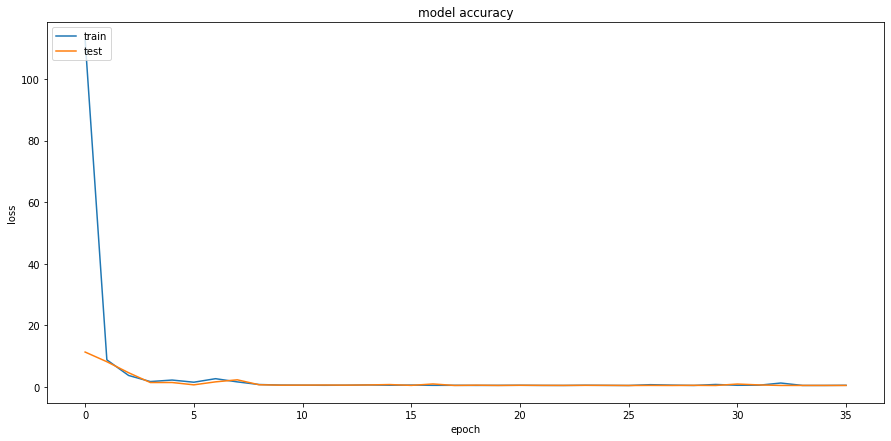

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_train,y_train,batch_size=64)

315/315 [==============================] - 2s 7ms/step - loss: 0.5289 - acc: 0.7787


[0.5289157032966614, 0.7786567211151123]

In [ ]:
model.evaluate(X_test,y_test,batch_size=64)

155/155 [==============================] - 1s 9ms/step - loss: 0.5275 - acc: 0.7791


[0.5275251865386963, 0.7790908813476562]

In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509254 sha256=2ff5f7c9ee5b192d09d2333a38092a30044e7b3ef7da247b665dfd8571b569bb
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap
explainer = shap.DeepExplainer(model , X_test)
shap_values = explainer.shap_values(pool)

#max_display needed to show more than 20 features
shap.summary_plot(shap_values, X_new_train, max_display = len(X_new_train.columns))


AttributeError: ignored